In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Reading Dataset
# Dataset is from https://www.kaggle.com/amruthjithrajvr/recruitment-scam
data=pd.read_csv("/content/drive/MyDrive/FJP/fake_job_postings (1).csv")

In [3]:
# Reading top 5 rows of our dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# To check the number of rows and column
data.shape

(17880, 18)

In [5]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [8]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [10]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting 
target = "fraudulent"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Financial Analyst,"US, CA, San Francisco",,Intercom (#URL_cb674f93cbcd215a3a0a57a8615a565...,About the jobIntercom is looking for an analys...,REQUIREMENTSA proven track record of initiatin...,Stock option grants in a fast growing companyC...,Full-time,Associate,Bachelor's Degree,Internet,Financial Analyst,0
1,iOS Developer,"US, FL, Fort Lauderdale",,,Job briefWe are looking for an iOS Developer w...,"RequirementsBS/MS degree in Computer Science, ...",Flexible work schedule from your home or at ou...,Contract,Associate,Bachelor's Degree,Computer Software,Information Technology,0
2,Systems Engineer,"US, NY, New York",IT,MAP Digital: MetaMeetings is a digital events ...,MAP Digital: MetaMeetingsTM is seeking an expe...,4+ years experience with Windows Desktop/Serve...,,,Mid-Senior level,,Events Services,Information Technology,0
3,Administrative Officer - Receptionist,"EG, C, Cairo, Nasr City",Administration,Thanks for visiting our Job Board. Please revi...,Role Summary:This is a combined Reception/Offi...,1 year previous experience in a similar role “...,Attractive pay prepackagesMobile allowanceTran...,Full-time,Entry level,Bachelor's Degree,Telecommunications,Administrative,0
4,Talent Acquisition Specialist USA,"US, NY, New York",People Operations,Founded in 2010 by a team from Google’s London...,Qubit: Cutting Edge Big Data EngineeringQubit ...,What you’ll needBy submitting your application...,Plenty of perksAs well as the opportunity to s...,Full-time,Associate,Bachelor's Degree,Internet,Human Resources,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
1728,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
1729,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
1730,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [11]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

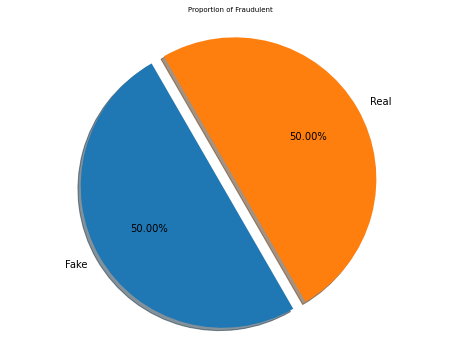

In [12]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [13]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

0       US
1       US
2       US
3       EG
4       US
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1732, dtype: object

In [14]:
# this will give unique country values
data['country'].nunique()

56

In [15]:
# top 10 country that post jobs 
data['country'].value_counts()[:11]

US    1228
GB     151
GR      55
AU      48
        37
CA      34
DE      19
NZ      19
IN      14
MY      12
NL       9
Name: country, dtype: int64

Text(0.5, 0, 'Countries')

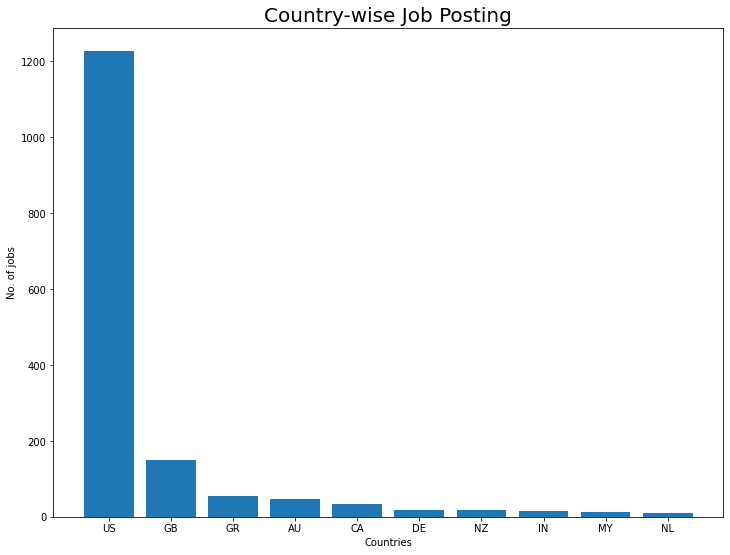

In [16]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [17]:
country.keys()

dict_keys(['US', 'GB', 'GR', 'AU', 'CA', 'DE', 'NZ', 'IN', 'MY', 'NL'])

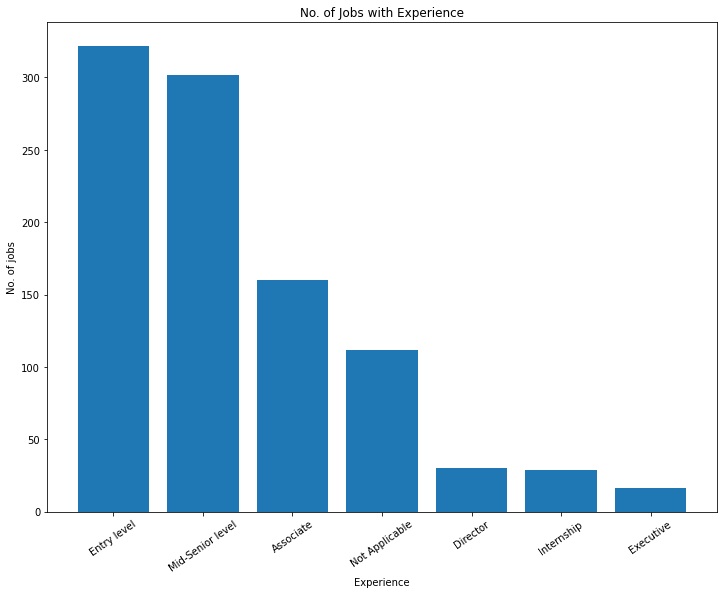

In [18]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [19]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [20]:
#Most frequent jobs
print(data.title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Administrative Assistant                                                20
Customer Service Representative                                         19
English Teacher Abroad                                                  18
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Customer Service Associate                                              11
Network Marketing                                                       10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [21]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [22]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [23]:
data.head()

,fraudulent,text
0,0,"Financial Analyst US, CA, San Francisco Interc..."
1,0,"iOS Developer US, FL, Fort Lauderdale Job br..."
2,0,"Systems Engineer US, NY, New York MAP Digital:..."
3,0,"Administrative Officer - Receptionist EG, C, C..."
4,0,"Talent Acquisition Specialist USA US, NY, New ..."


**Understanding the common words used in the texts : Wordcloud**

In [24]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 

In [25]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

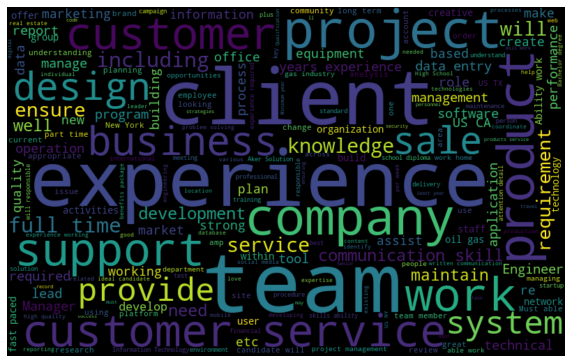

In [26]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


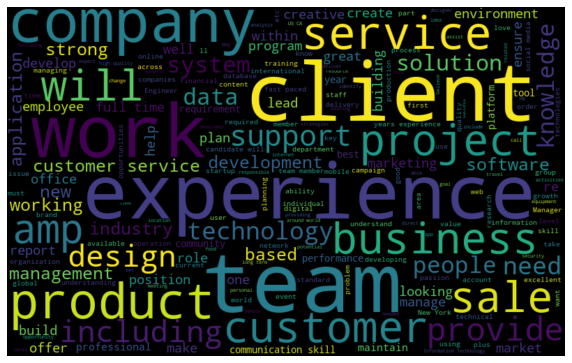

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [30]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

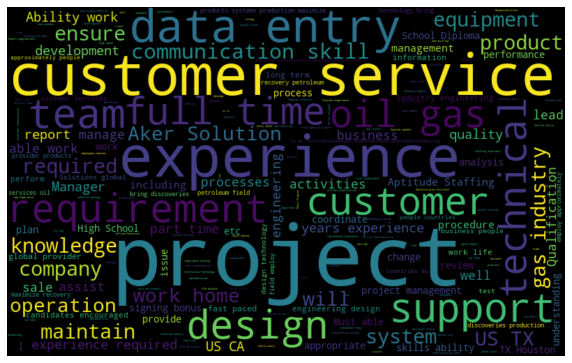

In [31]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [32]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [35]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [36]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [37]:
data['text'][0]

'financial analyst us, ca, san francisco intercom (#url_cb674f93cbcd215a3a0a57a8615a565545949eead8adbbc73307c26d6a6af81b#) simple, personal messaging service businesses customers. provides single, integrated platform whole company use support, marketing, product, sales communication more.we’re mission make web mobile business personal. believe future customer communication requires increasingly complex, impersonal point solutions, rather simple, seamless platform applies innovations found consumer services like facebook whatsapp.founded late 2011, intercom raised $30 million venture capital backed leading investors, social+capital partnership bessemer venture partners. intercom adopted thousands businesses, including heroku, hootsuite, rackspace, yahoo! perfect audience. customers love product: #url_18cc302f4e0f1dac521853b2a6ae109ebbe44c6130d31eb0413535ba71e2f42f#we like big thinkers small egos believe goal build uniquely impactful, long-lasting tech company. vision fundamentally chang

In [38]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [39]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


1513    1
1485    1
847     0
245     0
31      0
       ..
654     0
729     0
1217    1
26      0
154     0
Name: fraudulent, Length: 1212, dtype: int64
1513    administrative assistant us, nv, las vegas adm...
1485    success knocking... us, ga, atlanta ...we look...
847     interested joining seabourne team us, , data t...
245     community development intern gb, , london want...
31      customer service associate us, ny, latham novi...
                              ...                        
654     customer service team lead us, in, indianapoli...
729     customer care representative us, de, new castl...
1217    director peri-anesthesia us, ma, apply using l...
26      recruitment consultant gb, ken, sevenoaks look...
154     wordpress designer expert startup | studyhall....
Name: text, Length: 1212, dtype: object


In [40]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [41]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 229)	1
  (0, 322)	1
  (0, 538)	1
  (0, 789)	1
  (0, 845)	2
  (0, 1323)	1
  (0, 1440)	1
  (0, 1469)	1
  (0, 1674)	1
  (0, 1676)	1
  (0, 1699)	1
  (0, 1704)	1
  (0, 1749)	1
  (0, 2788)	1
  (0, 2914)	2
  (0, 3664)	1
  (0, 3699)	1
  (0, 3847)	1
  (0, 3935)	1
  (0, 4297)	1
  (0, 4313)	1
  (0, 4913)	1
  (0, 4939)	1
  (0, 5081)	1
  (0, 5694)	1
  :	:
  (1211, 17109)	5
  (1211, 17116)	3
  (1211, 17482)	1
  (1211, 17550)	1
  (1211, 17578)	1
  (1211, 17903)	1
  (1211, 17904)	1
  (1211, 17945)	1
  (1211, 18035)	5
  (1211, 18149)	1
  (1211, 18430)	1
  (1211, 18500)	1
  (1211, 18652)	1
  (1211, 18851)	1
  (1211, 18947)	5
  (1211, 19045)	3
  (1211, 19061)	1
  (1211, 19194)	1
  (1211, 19301)	1
  (1211, 19494)	1
  (1211, 19554)	2
  (1211, 19794)	3
  (1211, 19797)	4
  (1211, 19912)	1
  (1211, 19933)	1


In [42]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [43]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x20468 sparse matrix of type '<class 'numpy.int64'>'
	with 79272 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

<h2>Naive Bayes</h2>

In [45]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 7.07 ms, sys: 0 ns, total: 7.07 ms
Wall time: 28.5 ms


MultinomialNB()

In [60]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0
 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 

Classification Accuracy: 0.8980769230769231
Classification Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       260
           1       0.89      0.90      0.90       260

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

Confusion Matrix

[[232  28]
 [ 25 235]]


Text(69.0, 0.5, 'Truth')

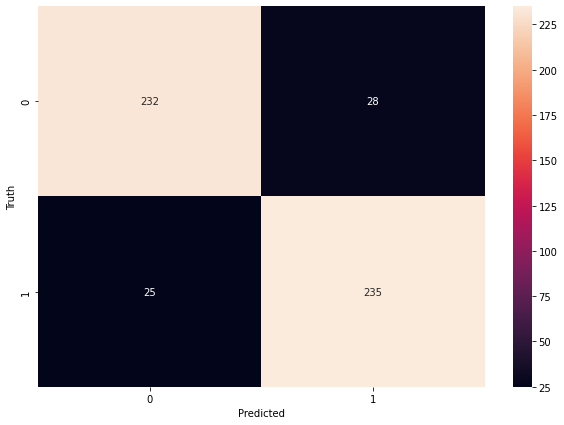

In [62]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2>Decision Tree Classifier</h2>

In [48]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [49]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 408 ms, sys: 4.52 ms, total: 412 ms
Wall time: 450 ms


DecisionTreeClassifier()

In [50]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [51]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Classification Accuracy: 0.8173076923076923
Classification Report

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       260
           1       0.80      0.85      0.82       260

    accuracy                           0.82       520
   macro avg       0.82      0.82      0.82       520
weighted avg       0.82      0.82      0.82       520

Confusion Matrix

[[204  56]
 [ 39 221]]


Text(69.0, 0.5, 'Truth')

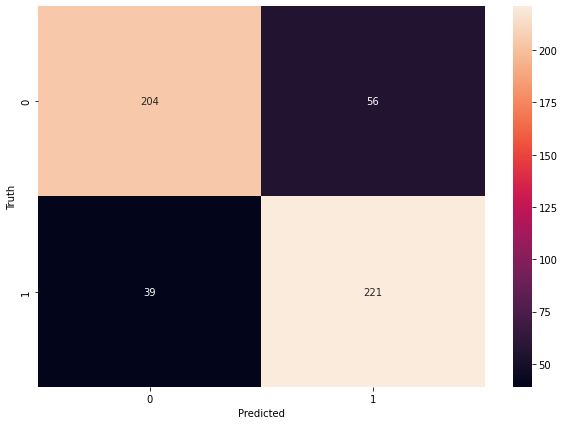

In [52]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [53]:
#Lets Predict for a data set
X_test

1559    agency sales managers $150-$175,000/yr us, ny,...
968     home based payroll typist/data entry clerks po...
317     product de, , berlin mission: making cities sm...
1223    registered nurse us, ky, apply using link#url_...
662     python / django developer us, tx, austin elect...
                              ...                        
1311    director product management us, ca, san mateo ...
1369    senior system engineering manager us, ca, san ...
972     urgent requirement : senior exchange & active ...
962     home based payroll data entry clerk position -...
1666    payroll clerk us, ga, columbus dyncorp interna...
Name: text, Length: 520, dtype: object

In [55]:
print(X_test[972])

urgent requirement : senior exchange & active directory systems administrator qatar. qa, , greetings vam systems…..vam systems business consulting, solutions services company operations uae, qatar, bahrain, usa, australia, singapore &amp; india. offers comprehensive list services field infrastructure management, cloud services, consulting services, banking, management resources, information technology development, telecom, aviation, retail management &amp; egovernment offerings.vam systems currently looking senior exchange &amp; active directory systems administrator qatar operations.terms conditions: joining time frame: 2 weeks (maximum 1 month).the selected candidates shall join vam systems – qatar shall deputed one leading organizations qatar.should interested opportunity, please send latest resume ms word format earliest #email_b08cf5e4101b4b7b7594fe3081f94f7f9a0f2d6192fb5d4a1a72ecf03c816e83# call us +91 #phone_df058aa8cbf405b99c6fc6459e7085be12bce0e56bcafe7d52281b99685a4a0f#. skil

In [56]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [57]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [59]:
#Lets check wether predicted result was correct or not
print(y_test[972])

1


Thus the predicted result was correct.